In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/liyi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.datasets import fetch_olivetti_faces 

In [3]:
oliv=fetch_olivetti_faces()

In [4]:
print oliv.keys() 
print oliv.data.shape #tells us there are 400 images that are 64 x 64 (4096) pixels each 

['images', 'data', 'target', 'DESCR']
(400, 4096)


In [9]:
oliv.data
np.savetxt("oliv.csv", oliv.data, delimiter=",")

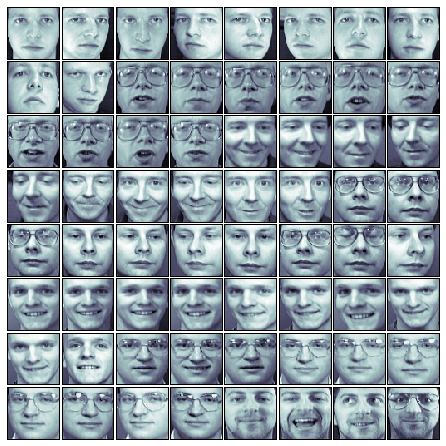

In [6]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [7]:
from sklearn.decomposition import PCA

In [8]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images. 
X,y=oliv.data, oliv.target 
pca_oliv = PCA(64) 
X_proj = pca_oliv.fit_transform(X) 
print X_proj.shape 

(400, 64)


In [9]:
print np.cumsum(pca_oliv.explained_variance_ratio_)

[ 0.23812732  0.37806705  0.45775318  0.5077365   0.54383492  0.57540423
  0.59967256  0.62003654  0.63961768  0.65633893  0.67229116  0.68666095
  0.69912839  0.71059972  0.72122848  0.73100567  0.74019629  0.74835205
  0.75589079  0.76336062  0.7703464   0.77649266  0.78233194  0.78802919
  0.79349113  0.79880971  0.80394787  0.80890626  0.81348288  0.8178947
  0.82191473  0.82575661  0.8293761   0.83272153  0.83592534  0.83908576
  0.84213722  0.84512359  0.84794497  0.85068506  0.85328281  0.85582274
  0.8582682   0.86066657  0.86297548  0.86523968  0.86746252  0.86966693
  0.87175614  0.87380594  0.87577438  0.87768877  0.87953925  0.88132864
  0.88310474  0.88482958  0.88651544  0.88815713  0.88977599  0.89135993
  0.89291424  0.89443654  0.89593613  0.89741325]


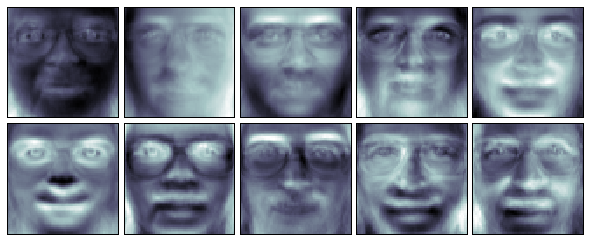

In [10]:
#This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components. 
#Each of these principal components can explain some variation in the original dataset. The parameter components_ of the 
#estimator object gives the components with maximum variance 
# Below we'll try to visualize the top 8 principal components. This is NOT a reconstruction of the original data, just 
# visualizing the principal components as images. The principal components are vectors of the length = to the number of 
# features 4096. We'll need to reshape it to a 64 x 64 matrix. 
#Setup a figure 8 inches by 8 inches 
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # plot the faces, each image is 64 by 64 pixels 
for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

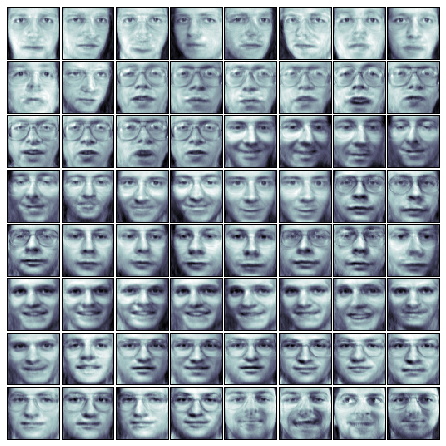

In [11]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images 
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them. 
X_inv_proj = pca_oliv.inverse_transform(X_proj) #reshaping as 400 images of 64x64 dimension 
X_proj_img = np.reshape(X_inv_proj,(400,64,64)) #Setup a figure 8 inches by 8 inches 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest') 
# This is not bad at all, the image still looks pretty good but the finer details are missing, which is okay considering 
# we've reduced dimensionality by 64 times. 